# Naive Bayes

In [ ]:
import pandas as pd
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import math

## 1. Classifying Digits
In this part, I will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website.

Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

I will plot a single sample of each digit as the original image in order to get a feeling how the data looks like.

Finally, I will divide the data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions. However, I will use the original data.

**Note 2:**
Since ML-Data is deprecated, I will use this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
len(x_train)

60000

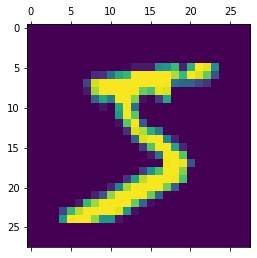

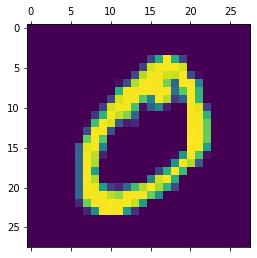

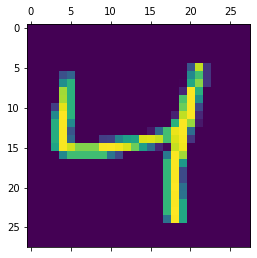

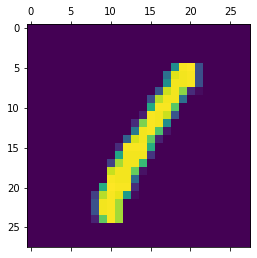

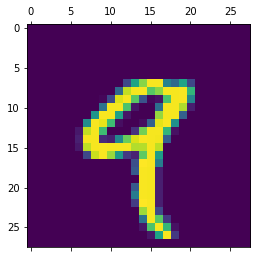

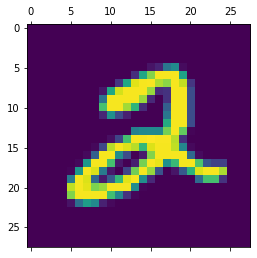

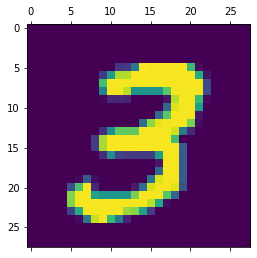

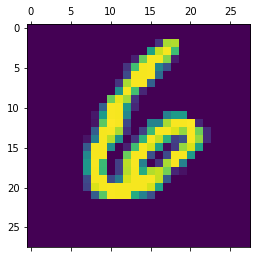

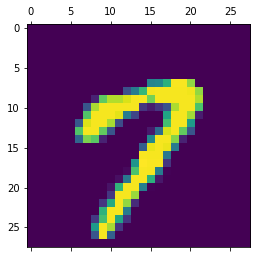

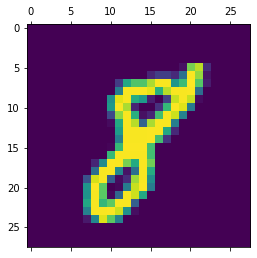

In [ ]:
# Sample plots of images from all labels
labels_array = [i for i in range(10)]  # Labels list
records_counter = 0

while len(labels_array) > 0:  # Searching for one sample for each label
  if y_train[records_counter] in labels_array:  # Found sample (784 values of pixels - 28X28)
    plt.matshow(x_train[records_counter])  # Ploting
    labels_array.remove(y_train[records_counter])
    records_counter +=1
  else:
    records_counter +=1

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part, I will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, I will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since I assume each pixel is either 0 (black) or 1 (white), I will need to adjust (preprocess) the data accrodingly (see below).

So, the model is stated as follows:

$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$



#### Question 2
In this part, I will run a Naive Bayes classifier on the training data and apply predictions on the test data.

Preprocess on the data is needed in this case such that each pixel would become either black (0) or white (1). For this, I will use the `binarize`parameter of the implementation. I will set this value to 0 (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.
1. I will plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (it can be done since this is a generative model).
2. I will plot the confusion matrix of my classifier, as claculated on the test data. I will calculate the total accuracy (fraction of correctly classified images), and summarize the results with the help of verbal explanations.


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
binary_x_train = binarize(x_train)
binary_x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
mnist_NB = BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)  # Creating naive bayes object
mnist_NB.fit(binary_x_train, y_train)  # Using 60000 from 70000 records (data + labels) to fit the model

BernoulliNB()

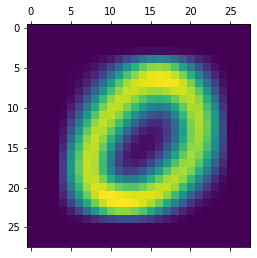

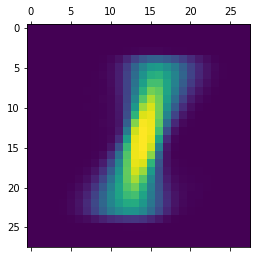

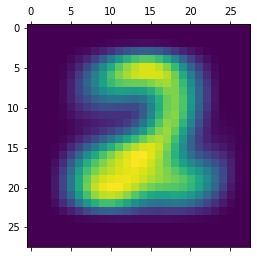

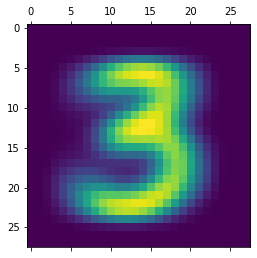

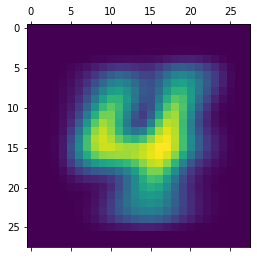

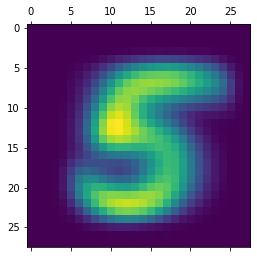

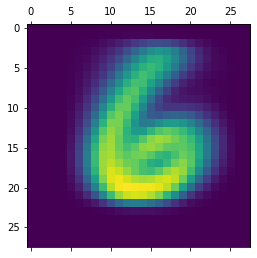

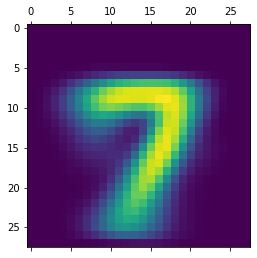

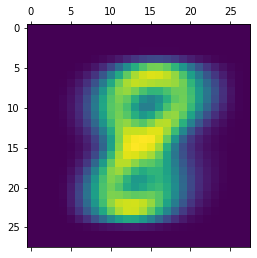

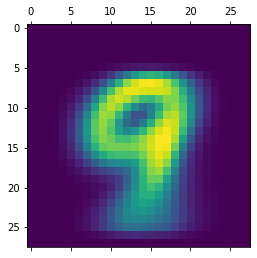

In [ ]:
mnist_log_prob = mnist_NB.feature_log_prob_  # Log likelihood probabilities for 0/1 in each cell
mean_prob = np.exp(mnist_log_prob)  # Likelihood values (not log anymore)
for i in range(10):
  mat = mean_prob[i].reshape(28,28)  # Reshaping likelihood values to 28X28 (2-d array) for each label
  plt.matshow(mat)  # Ploting the label image based on binarize = 0.0 and mean likelihood values

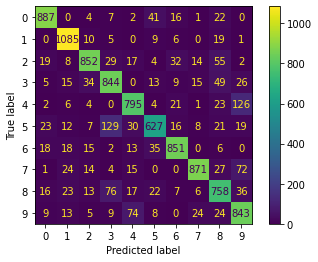

In [ ]:
binary_x_test = binarize(x_test)
labels_prediction = mnist_NB.predict(binary_x_test)
conf_mat = confusion_matrix(y_test, labels_prediction)
# Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

In order to find the optimal threshold for binarization, a decision tree analysis can be used taking into account information gain:

1. First, a decision tree classifier must be trained in order to predict the optimal threshold for a given image based on the extracted features. During training, the decision tree would split the data based on the feature that maximizes the information gain at each node.
2. Once the classifier is trained, its performance on a validation set of images can be evaluated, in order to determine the accuracy of the predictions.
3. In the end, the trained classifier can be used to predict the optimal threshold for each image in the dataset. Then, these predictions can be used to binarize the images and evaluate the performance of the resulting binarized images using eval metrices.



## 2. Classifing Text Documents using Multinomial Naive Bayes
In this part, I will classify the "20 newsgroups" data set using my own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

I will implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)`and implement its `fit`, `predict` and `predict_proba` methods.

Then, I will perform the next anlysis guidelines using the implemented class for train and test classifier:
- Load the **train** data using `from sklearn.datasets import fetch_20newsgroups` (I will remove headers, footers and quotes).
- Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
- use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
- Note: I will limit the vocuabolary size to avoid memory issues.
- Comparing the accuracy over the **test** data with the help of `accuracy_score, classification_report`
- compare to the built in `sklearn.naive_bayes.MultinomialNB`
- Compare to `TfidfVectorizer` preprocessing (I will use the built in model for doing the analysis).
- Plot the learning curve - is the model in the bias or variance regime (I will use the built in model for doing the analysis).
- Optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import ClassifierMixin,BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
# Extarcting the data, divided by train set and test set
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'),return_X_y=True)
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'),return_X_y=True)

In [ ]:
# The 1000 most common words and their term frequency
vectorizer = CountVectorizer(stop_words='english',max_features=1000)
text_counter = vectorizer.fit_transform(newsgroups_train[0])

In [ ]:
# Extracts the feature names
features_names = vectorizer.get_feature_names_out()

In [ ]:
from typing import Counter
from sklearn.utils.validation import check_X_y
class NaiveBayes(BaseEstimator, ClassifierMixin):
  '''
  BaseEstimator and ClassifierMixin are imported from sklearn.base
  '''
  def __init__(self):
    self.conditional_prob_dict = {}  # Each key is (term, label) and value is its probability to have 0 occurrences
    self.labels_prior_dict = {}  # Probability to be in each topic (by the train set) - represented by {topic: probability}
    self.pred_label_list = []  # Holds the predicted topic for each doc
    self.log_probs_by_docs = {}  # Hold the log probabilities for each document

  def sub_vecto_by_topic(self,vectorizer_by_x, topics_numbers, all_lables):
    '''
    Creates list which it's i index holds sub DF of topic i
    '''
    array_by_topic = []
    vectorizer_by_x['label'] = all_lables
    for l in topics_numbers:
      vecto_by_topic = vectorizer_by_x[(vectorizer_by_x['label'] == l)]
      array_by_topic.append(vecto_by_topic)
    return array_by_topic

  def fit(self, x, y):
    x = x.toarray()  # Changing it from sparse matrix to dense matrix
    x = pd.DataFrame(x,columns=features_names)  # Converts to a DataFrame with the features names
    topics_numbers = np.unique(y)  # Counts the number of unique topics in the data set
    array_by_topic = self.sub_vecto_by_topic(x, topics_numbers, y)  # Creates a list of sub-df by topic
    df_len = len(x)
    for sub_df in array_by_topic:  # Iterates over each sub-df
      sub_df_len = len(sub_df)
      self.labels_prior_dict[sub_df['label'].iloc[0]] = (sub_df_len + 1) / (df_len + 2)  # The prior for each label is the amount of docs with the label divided by the total amount of docs (using Laplace)
      for column_name in sub_df.loc[:-1]:  # Iterates over each feature (word)
        column = sub_df[column_name]
        count = (column == 0).sum()  # Get the count of zeros in column
        self.conditional_prob_dict[(column_name, sub_df['label'].iloc[0])] = (count + 1) / (sub_df_len + 2)  # Insertion with Laplace correction

  def predict_log_proba(self, x):
    counter = 0
    log_prob_list = [np.log(i) for i in self.labels_prior_dict.values()]  # Initialing the prob_list with the log of priors probabilities
    for feature in features_names:
      for l in self.labels_prior_dict.keys():  # Iterate over all the labels
        if (feature, l) in self.conditional_prob_dict:
          if x[counter] == 0:
            log_prob_list[l] += np.log(self.conditional_prob_dict[feature, l])  # Sum of logs
          else:
            log_prob_list[l] += np.log((1 - (self.conditional_prob_dict[feature, l])))  # Sum of logs
      counter += 1
    return log_prob_list

  def predict(self, x):
    doc_num = 0
    self.pred_label_list = []
    x = x.toarray()  # Changing it from sparse matrix to dense matrix
    for text in x:  # Iterates over each document
      log_prob_list = self.predict_log_proba(text)
      self.log_probs_by_docs[doc_num] = log_prob_list
      max_pred_lab = max(self.log_probs_by_docs[doc_num])  # Extracts the maximum probability
      pred_label = log_prob_list.index(max_pred_lab)  # Extracts the topic (by its index) with the max probability
      self.pred_label_list.append(pred_label)  # Inserts the predicted topic
      doc_num += 1
    return self.pred_label_list

In [ ]:
nb = NaiveBayes()
pipeline = make_pipeline(vectorizer, nb)

In [ ]:
# Fits the model and predicts the labels (topics)
pipeline.fit(newsgroups_train[0], newsgroups_train[1])
y_pred = pipeline.predict(newsgroups_test[0])

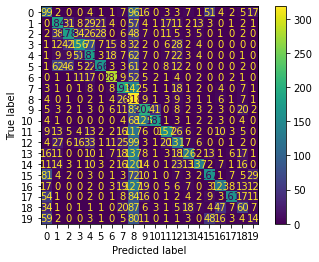

In [ ]:
y_true = newsgroups_test[1]
topics_numbers = np.unique(y_true)
conf_mat = confusion_matrix(y_true, y_pred)  # Creates confusion matrix with the actual labels and the predicted labels
# Plot the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = topics_numbers)
cm_display.plot()
plt.show()

In [ ]:
# Our Naive Bayes model performance (represented by Accuracy score and Classifaction report)
our_accuracy = metrics.accuracy_score(y_true, y_pred)
print("Our accuracy score is: " , our_accuracy)
print(classification_report(newsgroups_test[1],y_pred))

Our accuracy score is:  0.4269782262347318
              precision    recall  f1-score   support

           0       0.24      0.31      0.27       319
           1       0.48      0.47      0.47       389
           2       0.55      0.45      0.49       394
           3       0.54      0.40      0.46       392
           4       0.41      0.47      0.44       385
           5       0.70      0.42      0.53       395
           6       0.77      0.72      0.74       390
           7       0.48      0.49      0.48       396
           8       0.16      0.80      0.27       398
           9       0.42      0.51      0.46       397
          10       0.78      0.45      0.57       399
          11       0.64      0.40      0.49       396
          12       0.38      0.33      0.36       393
          13       0.59      0.32      0.41       396
          14       0.70      0.35      0.47       394
          15       0.55      0.42      0.48       398
          16       0.54      0.34     

In [ ]:
# The built-in Multinomial Naive Bayes model performance (represented by Accuracy score and Classifaction report)
real_multi_NB = MultinomialNB()
pipe = make_pipeline(vectorizer, real_multi_NB)
pipe.fit(newsgroups_train[0], newsgroups_train[1])
predictions = pipe.predict(newsgroups_test[0])
print("The accuracy score is: ", accuracy_score(newsgroups_test[1], predictions))
print("Classification Report:", classification_report(newsgroups_test[1], predictions))

The accuracy score is:  0.4638874137015401
Classification Report:               precision    recall  f1-score   support

           0       0.29      0.42      0.34       319
           1       0.44      0.57      0.50       389
           2       0.00      0.00      0.00       394
           3       0.40      0.47      0.43       392
           4       0.43      0.50      0.46       385
           5       0.60      0.56      0.58       395
           6       0.75      0.70      0.73       390
           7       0.48      0.56      0.52       396
           8       0.41      0.53      0.46       398
           9       0.48      0.58      0.53       397
          10       0.31      0.37      0.34       399
          11       0.74      0.55      0.63       396
          12       0.38      0.40      0.39       393
          13       0.46      0.46      0.46       396
          14       0.69      0.47      0.56       394
          15       0.49      0.58      0.53       398
          16   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# The built-in Multinomial Naive Bayes model performance using TF-IDF vectorizer in the preprocessing (represented by Accuracy score and Classifaction report)
multi_NB = MultinomialNB()
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
text_counter = tfidf_vectorizer.fit_transform(newsgroups_train[0])
pipe2 = make_pipeline(tfidf_vectorizer, multi_NB)
pipe2.fit(newsgroups_train[0], newsgroups_train[1])
predictions = pipe2.predict(newsgroups_test[0])
print("The accuracy score is: ", accuracy_score(newsgroups_test[1], predictions))
print("Classification Report:", classification_report(newsgroups_test[1], predictions))

The accuracy score is:  0.5262878385554965
Classification Report:               precision    recall  f1-score   support

           0       0.34      0.33      0.33       319
           1       0.51      0.57      0.54       389
           2       0.53      0.55      0.54       394
           3       0.46      0.46      0.46       392
           4       0.56      0.49      0.52       385
           5       0.62      0.62      0.62       395
           6       0.69      0.75      0.72       390
           7       0.59      0.55      0.57       396
           8       0.55      0.50      0.53       398
           9       0.53      0.53      0.53       397
          10       0.40      0.68      0.50       399
          11       0.73      0.58      0.65       396
          12       0.45      0.36      0.40       393
          13       0.48      0.58      0.52       396
          14       0.66      0.54      0.59       394
          15       0.45      0.76      0.56       398
          16   

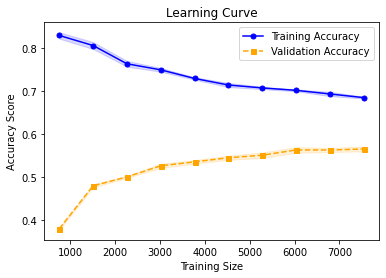

In [ ]:
# Plotting the learning curve
train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe2,
                   X=newsgroups_train[0],
                   y=newsgroups_train[1],
                   scoring='accuracy',
                   train_sizes=np.linspace(0.1, 1.0, 10),  # Takes every time 10% more of the training set
                   cv=3,
                   n_jobs=3)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training Accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='orange', linestyle='--',
         marker='s', markersize=5,
         label='Validation Accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='orange')

plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc = 'best')

In [ ]:
# Optimizing performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.)
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier
clf = make_pipeline(tfidf_vectorizer, multi_NB)

# Choose some parameter combinations to try
parameters = {"tfidfvectorizer__stop_words" : ["english", None],  # Remove english stop words or don't remove anything
              "tfidfvectorizer__max_features" : [1000, 2000, 5000, None],  # Use max features of 1000, 2000, 5000 or all of them
              "tfidfvectorizer__max_df" : [0.85, 0.9, 0.95],  # Ignore terms that have a df strictly higher (proportion of documents) than the given threshold
              "tfidfvectorizer__min_df" : [0, 0.1, 0.2]  # Ignore terms that have a df strictly lower (proportion of documents) than the given threshold
             }

# Run the grid search, comparison by accuracy score
grid_search = GridSearchCV(clf,
                           parameters,
                           cv=3,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(newsgroups_train[0], newsgroups_train[1])
print("The best combination of hyper parameters is: ", grid_search.best_params_, "whose score is: ", grid_search.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
The best combination of hyper parameters is:  {'tfidfvectorizer__max_df': 0.85, 'tfidfvectorizer__max_features': None, 'tfidfvectorizer__min_df': 0, 'tfidfvectorizer__stop_words': 'english'} whose score is:  0.7103593506620963


#### Model interpretability
In this part, I will find the most important features for a specific decision of a NB classifier. Since the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$ I will implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

I will use the following model properties:
* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: these are logs, thus using np.exp and normalize to get $P(c|x_i)$ is needed.

* I will use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. I will use the `print_txt` function below to color words and find top words that support the correct class and support the wrong class.


In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  mid_color='\x1b[45;37m{}\x1b[0m'
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()  # Takes each word in the text and changes it to lower letters
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)  ## 3 actions to stem the words in purpose for the vectorizer to recognize them
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [ ]:
def calc_p_c_given_xi(model):
  p_c = np.exp(model.class_log_prior_)  ## p(c) - prior of every topic
  p_w_c = np.exp(model.feature_log_prob_)  ## p(xi|c) - probability to get a word if I know which label the text I got is
  p_c_w = p_c.reshape(-1, 1) * p_w_c  ## changing the sizes in order to do matrix mul
  p_c_w = p_c_w / p_c_w.sum(axis=0)   ## the denominator of Naive Bayes
  return p_c_w      # returns p(c|xi) - prob to be in specific topic for a specific word

multi_NB2 = MultinomialNB()
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english')  ## regular vectorizer without attributes limit for the pipeline
pipe3 = make_pipeline(tfidf_vectorizer2, multi_NB2)  ## Pipline creation for Model interpretability question
pipe3.fit(newsgroups_train[0], newsgroups_train[1])
p_c_w = calc_p_c_given_xi(multi_NB2)

In [ ]:
x_s = tfidf_vectorizer2.transform(newsgroups_test[0])
idx2word={v:k for k, v in tfidf_vectorizer2.vocabulary_.items()}  # concating the word to it's freq ranking of the vectorizer

def word_by_score(c, word_index, min_p=0.1, max_n=10):

  word_score = p_c_w[c, word_index]  ## taking score from p(c|xi) mat represantation
  words =[idx2word[w] for w in word_index]
  s = pd.Series(word_score.flatten(), index=[words, word_index])  ## ordering it in porpuse to respresent in table after it (in the printing)
  s.index.names=['word','idx']
  s.name = 'score'
  stop = s.sort_values(ascending=False)  ## sort by probability
  stop = stop[stop > min_p]  ## determing number of word to represent in the printing table
  if len(stop) > max_n:
    stop = stop[:max_n]
  return stop.reset_index()

In [ ]:
def display_doc(i):
  """
  displaying document i
  """
  c_hat = pipe3.predict(newsgroups_test[0])[i]  # Predicted topic of a document
  c = newsgroups_test[1][i]  # Actual topic of a document
  txt = newsgroups_test[0][i]
  xi = x_s[i,:]
  non_zero_words = xi.nonzero()[1] # non zero words
  newsgroups_train1 = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
  our_labels = newsgroups_train1.target_names

  print('')
  print('document={}, c={} ({}), guess correctly = {}'.format(i, c, our_labels[c], c_hat==c))
  print('-'*80)
  hot = word_by_score(c, non_zero_words)
  print(hot)
  hot_words = hot.word.tolist()
  if c_hat!=c:
    print('-'*80)
    print('score for incorrect guess c_hat={} ({})'.format(c_hat, our_labels[c_hat]))
    print('-'*80)
    cold = word_by_score(c_hat, non_zero_words)
    cold_words = cold.word.tolist()
    print(cold)
  else:
    cold_words = []
  print('-'*80)
  print('text:')
  print('-'*80)
  print_txt(txt, hot_words, cold_words)

In [ ]:
display_doc(14)


document=14, c=0 (alt.atheism), guess correctly = False
--------------------------------------------------------------------------------
       word    idx     score
0  religion  77072  0.210060
1  morality  62944  0.204899
2    belief  22219  0.160754
3       god  43733  0.147699
4     bible  22649  0.134100
5  evidence  38225  0.108499
--------------------------------------------------------------------------------
score for incorrect guess c_hat=15 (soc.religion.christian)
--------------------------------------------------------------------------------
         word    idx     score
0         god  43733  0.493657
1       jesus  52019  0.458263
2      christ  27138  0.415796
3  christians  27153  0.398583
4       faith  39317  0.379607
5       bible  22649  0.362321
6   christian  27148  0.351953
7       truth  90140  0.279501
8      belief  22219  0.218372
9    religion  77072  0.193561
--------------------------------------------------------------------------------
text:
---------

The last part was done with the help of the tutorial:

*   https://github.com/chanansh/right_but_why

There are several ways to try to improve the separation between samples in the data before applying a naive Bayes classifier:
1. **Feature engineering:** you can try to extract more relevant features from the data that can better discriminate between the different classes. For example, combining words to a prhase (by a dictionary that will hold common expressions) or try creating new features in other way using domain knowledge.

2. **Dimensionality reduction:** If you have a large number of features, you can try using dimensionality reduction techniques, such as principal component analysis (PCA) or linear discriminant analysis (LDA), to reduce the number of dimensions in the data while preserving as much of the class discrimination information as possible.

3. **Data normalization:** normalizing the data will lead to have mean with a value of zero and the standard deviation with a value of one. It can help to improve the separation between samples.

4. **Data balancing:** If there is an imbalanced classes, you can try balancing the classes by oversampling the minority classes or undersampling the majority classes.


